In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv("spain_energy_market.csv")

In [3]:
dataset.size

241272

In [4]:
dataset.shape

(40212, 6)

In [5]:
dataset.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  40212 non-null  object 
 1   id        40212 non-null  int64  
 2   name      34734 non-null  object 
 3   geoid     10956 non-null  float64
 4   geoname   10956 non-null  object 
 5   value     40212 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


<Axes: >

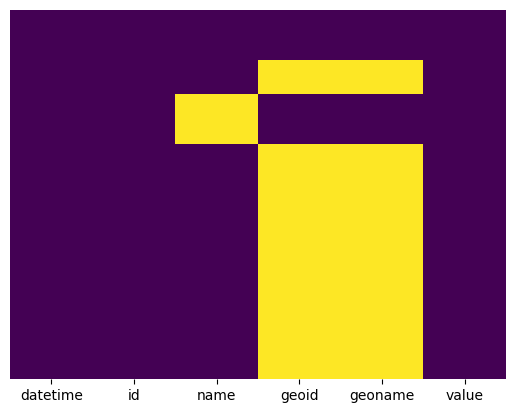

In [7]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
dataset['geoid'].fillna(0, inplace=True)

In [9]:
dataset.name[pd.isna(dataset.name)] = 'Missing' 
dataset.geoname[pd.isna(dataset.geoname)] = 'Missing' 

C:\Users\neeth\AppData\Local\Temp\ipykernel_13756\835685835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.name[pd.isna(dataset.name)] = 'Missing'
C:\Users\neeth\AppData\Local\Temp\ipykernel_13756\835685835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.geoname[pd.isna(dataset.geoname)] = 'Missing'


<Axes: >

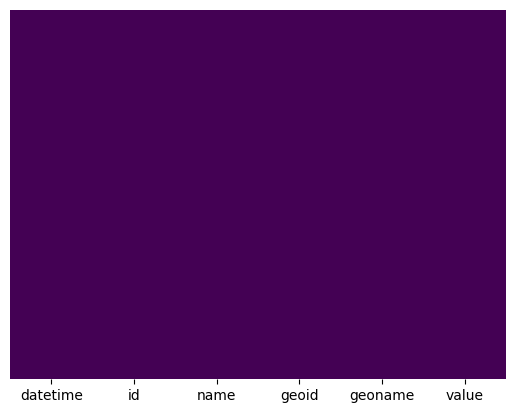

In [10]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For datetime,1826 unique values present
For id,18 unique values present
For name,21 unique values present
For geoid,4 unique values present
For geoname,4 unique values present
For value,29946 unique values present


C:\Users\neeth\AppData\Local\Temp\ipykernel_13756\2504329267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=dataset.corr()


<Axes: >

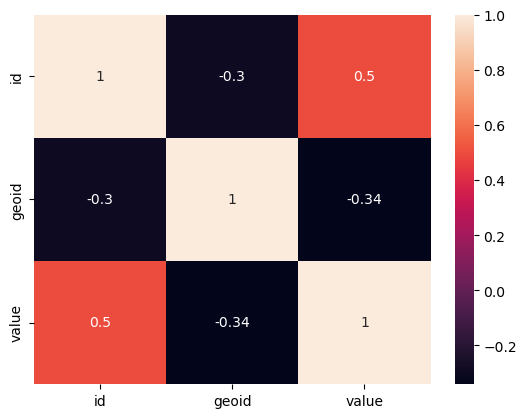

In [12]:
corrmat=dataset.corr()
sns.heatmap(corrmat, annot=True)

In [13]:
dataset.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [14]:
name = pd.get_dummies(dataset['name'],drop_first=True)
geoname = pd.get_dummies(dataset['geoname'],drop_first=True)

In [15]:
dataset = pd.concat([dataset,name,geoname],axis=1)

In [16]:
dataset.drop(['datetime','name','geoname','geoid'],axis=1,inplace=True)

In [17]:
dataset.head()

,id,value,Demanda real,Energía asignada en Mercado SPOT Diario España,Energía asignada en Mercado SPOT Diario Francia,Generación programada PBF Carbón,Generación programada PBF Ciclo combinado,Generación programada PBF Eólica,Generación programada PBF Gas Natural Cogeneración,Generación programada PBF Nuclear,...,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Rentas de congestión mecanismos implícitos diario Francia exportación,Rentas de congestión mecanismos implícitos diario Francia importación,Rentas de congestión mecanismos implícitos diario Portugal exportación,Rentas de congestión mecanismos implícitos diario Portugal importación,Francia,Missing,Portugal
0,600,25.280833,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,600,39.924167,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,600,4.992083,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,600,4.091667,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,600,13.587500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<Axes: >

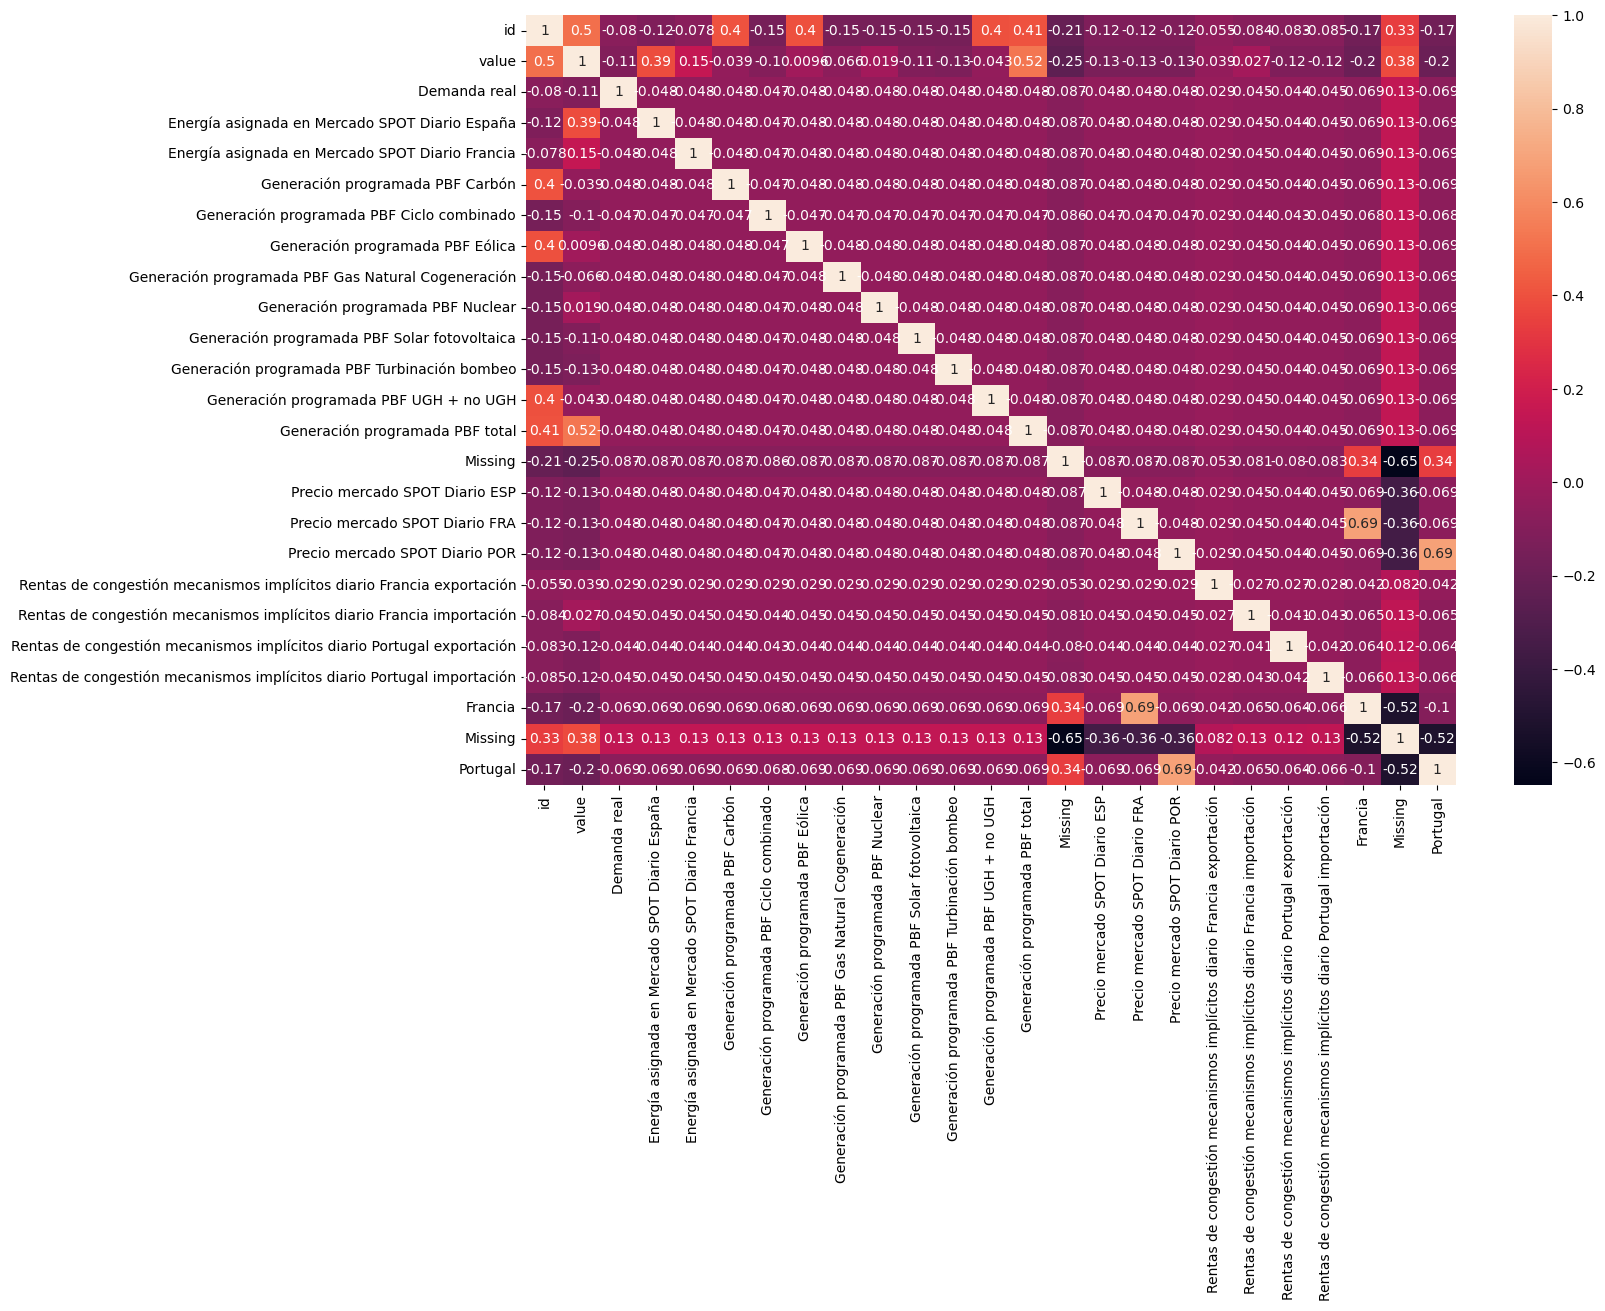

In [18]:
plt.figure(figsize=(15,10))
corrmat=dataset.corr()
sns.heatmap(corrmat, annot=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('value',axis=1),dataset['value'], test_size=0.30, 
                                                    random_state=101)

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
pred_lr = lr.predict(X_test)
expl_lr = explained_variance_score(pred_lr,y_test)

# Calculate Model Score 

In [21]:
print("Multiple Linear Regression Model Score is ",round(lr.score(X_test,y_test)*100))

models_score =pd.DataFrame({'Model':['Linear Regression'],
                            'Score':[lr_score],
                            'Explained Variance Score':[expl_lr]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  90


,Model,Score,Explained Variance Score
0,Linear Regression,0.901341,0.890871
